# Introduction to neural networks classification with TensorFlow

In this notebooks we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles

X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
# Check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


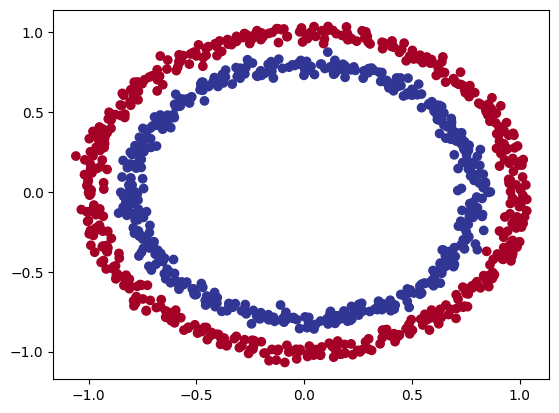

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [8]:
# View the firts example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [9]:
import tensorflow as tf
# Set a random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model

model_1.fit(X,y,epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4490 - loss: 6.5265   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 6.5021 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 6.4640 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4488 - loss: 6.4415 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 6.4009 


In [10]:
# Let's try and imrpove our model by training for longer ...
model_1.fit(X,y,epochs=200,verbose=0)

In [11]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5050 - loss: 0.7484  


[0.7714636325836182, 0.49000000953674316]

Since we're working on a binary classification problem and our model is getting around 50% accuracy ... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 0.6977  


[0.6943075656890869, 0.49399998784065247]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase the number of hidden unit within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4668 - loss: 3.7439   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4467 - loss: 0.7672 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 0.7233 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4673 - loss: 0.7016 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4532 - loss: 0.6961 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 0.6949 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4435 - loss: 0.6947 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4480 - loss: 0.6948 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4489 - loss: 0.6950 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4495 - loss: 0.6951 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4506 - loss: 0.6952 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [15]:
#Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5118 - loss: 0.6913  


[0.6955525875091553, 0.49300000071525574]

## To visualize our model's prefictions, let's create a function 'plot_decision_boundory', this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well a line between zones (where each unique class falls)


In [16]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.

  """

  # Define the axis boundaries of the plot and create the meshgrid

  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  # Create X value
  x_in = np.c_[xx.ravel(),yy.ravel()] #Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")

    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
doing binary classification


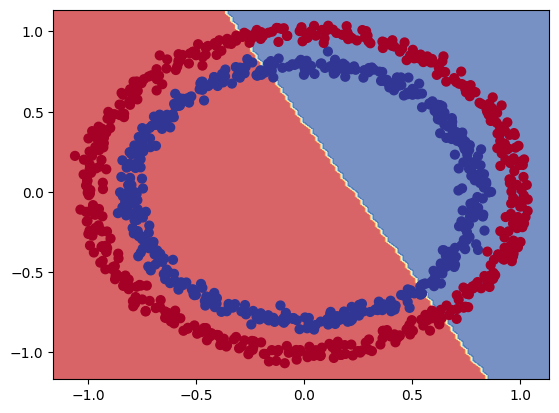

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,X=X,y=y)

In [ ]:
# Create the model
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x+100

# Split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend()

## Non-liearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)

])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_4.fit(X,y,epochs=100)

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,X,y)

Let's try our first NN with non-linear activation function

In [ ]:
#Set random seed

tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

# Compile the model

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
model_5.fit(X,y,epochs=100)

In [ ]:
# Time to replicate the multi-layer neural network from tf playground

#set the random seed
tf.random.set_seed(42)

# Creatr the model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(X,y,epochs=100)

In [ ]:
# Evaluate
model_6.evaluate(X,y)

In [ ]:
# How to look ouyr model
plot_decision_boundary(model_6,X,y)

In [ ]:
# set a random seed
tf.random.set_seed(42)

# Create the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model

history=model_7.fit(X,y,epochs=100)

In [ ]:
# Evaluate the model
model_7.evaluate(X,y)

In [ ]:
# Let's visualize
plot_decision_boundary(model_7,X,y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replecating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

# Use the relu function in our toy tensor
relu(A)

In [ ]:
# Plot our toy tensoy using relu function
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change ?

A == tf.keras.activations.linear(A)

## Evaluating and improving our classification

So far we've been training and tersting on the same dataset ...


In [ ]:
# Check how many examples we have
len(X)

In [ ]:
# Split into train and test set

X_train, y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [ ]:
# Let's recrete a model to fit on the training data and evaluate on the test data

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])
# Fit the model

history = model_8.fit(X_train,y_train,epochs=25)

In [ ]:
# Evaluate the model
model_8.evaluate(X_test,y_test)

In [ ]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

## Plot the loss(or training) curves

In [ ]:
# Convert the history object into DataFrame

pd.DataFrame(history.history)

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title(" Model_8 loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training.
*Another model (we vould use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
# Before to call a callback we need to create the callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model (passing lr_schedule callback)

history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
# Let's try using a highger *ideal* learning rate with the same model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model

model_10.compile(loss="binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10=model_10.fit(X_train,y_train,epochs=20)

In [ ]:
# Evaluate the model_10
model_10.evaluate(X_test,y_test)

In [ ]:
# Evaluate model_8
model_8.evaluate(X_test,y_test)

In [ ]:
# Plot the decision boundaries for the training and test set

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Consufion Matrix
* Classification Report (sklearn)

In [ ]:
# Check ther accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

## How about a consufion matrix?

In [ ]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix


# Make predictions

y_preds = model_10.predict(X_test)

# Create a confusion Matrix

confusion_matrix(y_test,y_preds)

In [ ]:
y_test[:10]

In [ ]:
y_preds[:10]

Looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the firts 10
tf.round(y_preds)[:10]

In [ ]:
# Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

## How about we prettify our confusion matrix?

In [ ]:
import itertools

figsize=(10,10)

# Create the confusion matrix

cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it

fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors

threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell

for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                              horizontalalignment="center",
                              color="white" if cm[i,j] > threshold else "black",
                              size=15)


# Multiclass classification (working with a large example)

When you have more than two classes as an option, it's known as **multi-class classificstion**.

* This mean if you have 3 or more diffirent classes, it's multi-class classification.

To practice multi-class classification we're going to build a NN to clssify images of different items of clothing.


In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [19]:
# Show the firts training example
print(f"Training example:\n{train_data[0]}\n")
print(f"Label:\n{train_labels[0]}")

Training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [20]:
# Check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

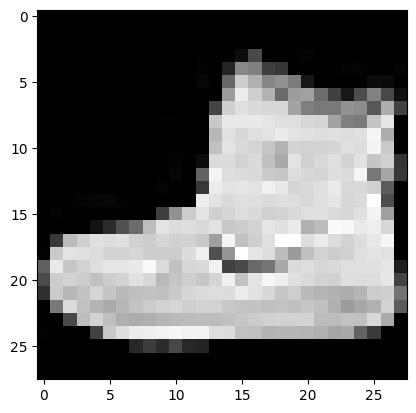

In [21]:
# plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap="gray")

In [22]:
# Check out samples labels
train_labels[0]

9

In [23]:
# Create a small list so we can index onto our training labels so they're human-readable

class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_name)

10

Text(0.5, 1.0, 'T-shirt/top')

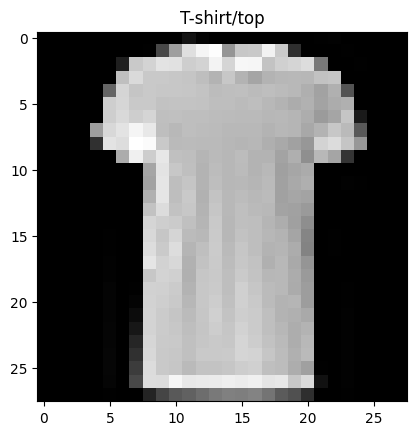

In [24]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap="gray")
plt.title(class_name[train_labels[index_of_choice]])

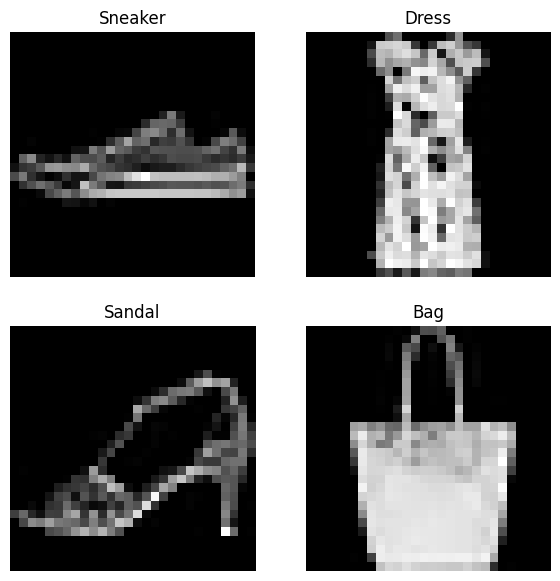

In [25]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap="gray")
  plt.title(class_name[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:

* Input shape = 28x28 (the shape of 1 image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax

In [26]:
# Set random seed

tf.random.set_seed(42)

# Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model

non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1274 - loss: 3.4748 - val_accuracy: 0.2032 - val_loss: 2.0314
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.2083 - loss: 2.0179 - val_accuracy: 0.2195 - val_loss: 1.9697
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2317 - loss: 1.9463 - val_accuracy: 0.3277 - val_loss: 1.5379
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3466 - loss: 1.5066 - val_accuracy: 0.3260 - val_loss: 1.4740
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3931 - loss: 1.3789 - val_accuracy: 0.4407 - val_loss: 1.3028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4528 - loss: 1.2917 - val_accuracy: 0.4544 - val_loss: 1.2516
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4708 - loss: 1.2516 - val_accuracy: 0.4643 - val_loss: 1.2375
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4781 - loss: 1.2275 - val_accurac

In [27]:
# Check the model summary
model_11.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [28]:
# Check the min and max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this mean they like to have the numbers in the tensor they try to find the patterns between 0 and 1.

In [29]:
# We can get our training and testing data between 0 & 1 by dividing by maximum.
train_data_norm = train_data/255.
test_data_norm = test_data/255.

# Check the mind and max values of the scaled training data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [30]:
# Now our data is norm,alized, let's build a model to find patterns in it

# Set the random seed
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model

norm_history = model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4190 - loss: 1.4824 - val_accuracy: 0.7729 - val_loss: 0.6720
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7837 - loss: 0.6325 - val_accuracy: 0.7991 - val_loss: 0.5933
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8024 - loss: 0.5716 - val_accuracy: 0.8042 - val_loss: 0.5716
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8116 - loss: 0.5469 - val_accuracy: 0.8100 - val_loss: 0.5564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8164 - loss: 0.5315 - val_accuracy: 0.8113 - val_loss: 0.5478
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8196 - loss: 0.5207 - val_accuracy: 0.8133 - val_loss: 0.5405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8214 - loss: 0.5124 - val_accuracy: 0.8145 - val_loss: 0.5360
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8238 - loss: 0.5055 - 

<Axes: title={'center': 'Normalized data'}>

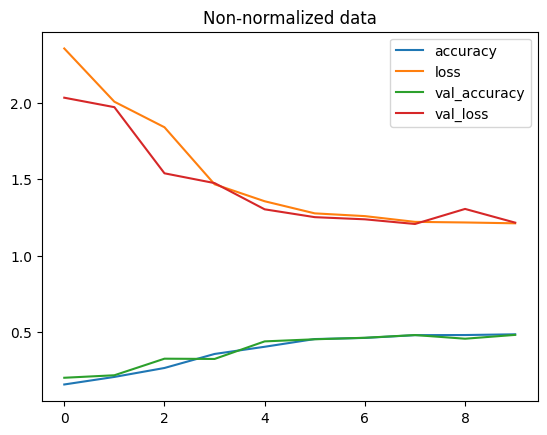

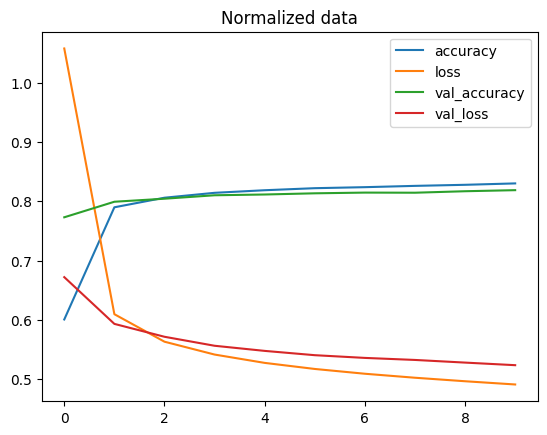

In [31]:
import pandas as pd

# Plot non-normalized dara loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [32]:
# Set the random seed

tf.random.set_seed(42)

# Create the model

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )
# Create the learning rate callback
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks=[lr_schedule])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5022 - loss: 1.4203 - val_accuracy: 0.7546 - val_loss: 0.6840 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7688 - loss: 0.6507 - val_accuracy: 0.7758 - val_loss: 0.6288 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7847 - loss: 0.6071 - val_accuracy: 0.7873 - val_loss: 0.6058 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7931 - loss: 0.5867 - val_accuracy: 0.7948 - val_loss: 0.5918 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7983 - loss: 0.5727 - val_accuracy: 0.7988 - val_loss: 0.5831 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8027 - loss: 0.5614 - val_accuracy: 0.8010 - val_loss: 0.5750 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8065 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

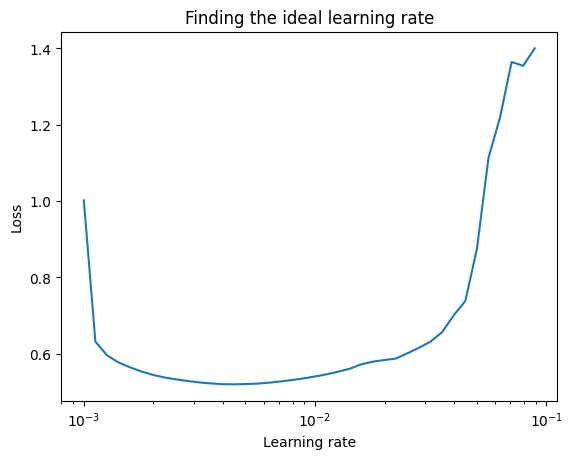

In [33]:
# Plot le learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [34]:
# Let's refit a model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# Compile the model

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model

history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4357 - loss: 1.4311 - val_accuracy: 0.7351 - val_loss: 0.7195
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7523 - loss: 0.6772 - val_accuracy: 0.7630 - val_loss: 0.6511
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7716 - loss: 0.6186 - val_accuracy: 0.7704 - val_loss: 0.6293
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7794 - loss: 0.5946 - val_accuracy: 0.7728 - val_loss: 0.6183
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7859 - loss: 0.5801 - val_accuracy: 0.7779 - val_loss: 0.6118
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7912 - loss: 0.5705 - val_accuracy: 0.7848 - val_loss: 0.6044
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7978 - loss: 0.5616 - val_accuracy: 0.7911 - val_loss: 0.6006
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8053 - loss: 0.5519 - 

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2 ...

In [35]:
# Create the consufion matrix
from sklearn.metrics import confusion_matrix
import itertools


def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),text_size=15):


  # Create the confusion matrix

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)


  # Set labels to be classes

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes

  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors

  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                                horizontalalignment="center",
                                color="white" if cm[i,j] > threshold else "black",
                                size=text_size)


In [36]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [37]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

#view the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.77373305e-08, 4.56364432e-05, 2.52479287e-10, 4.10850635e-06,
        6.56743937e-10, 2.16999814e-01, 3.42314579e-11, 2.96965033e-01,
        4.00654280e-05, 4.85945284e-01],
       [1.97128169e-02, 4.03376296e-04, 7.61072457e-01, 3.23676714e-03,
        5.20350523e-02, 1.39793323e-04, 1.47408888e-01, 3.61134731e-08,
        1.59907583e-02, 3.33668893e-09],
       [2.84404997e-08, 9.98344302e-01, 9.68188973e-10, 1.37310114e-03,
        1.11457179e-04, 1.58703522e-04, 1.83100362e-08, 1.94377104e-14,
        1.45356635e-11, 1.23114387e-05],
       [6.13628037e-10, 9.99701977e-01, 4.52037990e-11, 2.07234538e-04,
        8.08536934e-05, 9.52151186e-06, 1.98774885e-09, 6.25735291e-18,
        1.61325251e-14, 3.78553040e-07],
       [5.81467077e-02, 7.91222774e-05, 1.23247385e-01, 1.88605115e-02,
        6.62416965e-02, 1.77384585e-09, 7.33086586e-01, 4.79440740e-14,
        3.37980571e-04, 1.24777131e-12]], dtype=float32)

In [39]:
y_probs[0], tf.argmax(y_probs[0]),class_name[tf.argmax(y_probs[0])]

(array([4.7737331e-08, 4.5636443e-05, 2.5247929e-10, 4.1085063e-06,
        6.5674394e-10, 2.1699981e-01, 3.4231458e-11, 2.9696503e-01,
        4.0065428e-05, 4.8594528e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [40]:
# Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,y_pred=y_preds)

array([[706,   2,  43, 110,   9,   0, 113,   0,  17,   0],
       [  1, 951,  12,  29,   4,   3,   0,   0,   0,   0],
       [ 14,   3, 766,  16, 142,   1,  56,   0,   2,   0],
       [ 23,  36,  23, 846,  38,   6,  22,   0,   6,   0],
       [  1,  13, 167,  32, 728,   2,  55,   0,   2,   0],
       [  0,   1,   0,   0,   0, 910,   0,  50,  16,  23],
       [170,   3, 214,  68, 116,   2, 414,   0,  13,   0],
       [  0,   0,   0,   0,   0,  50,   0, 925,   0,  25],
       [ 10,   0,  39,  11,   2,  16,   5,   7, 910,   0],
       [  0,   0,   0,   0,   0,  33,   0,  70,   3, 894]])

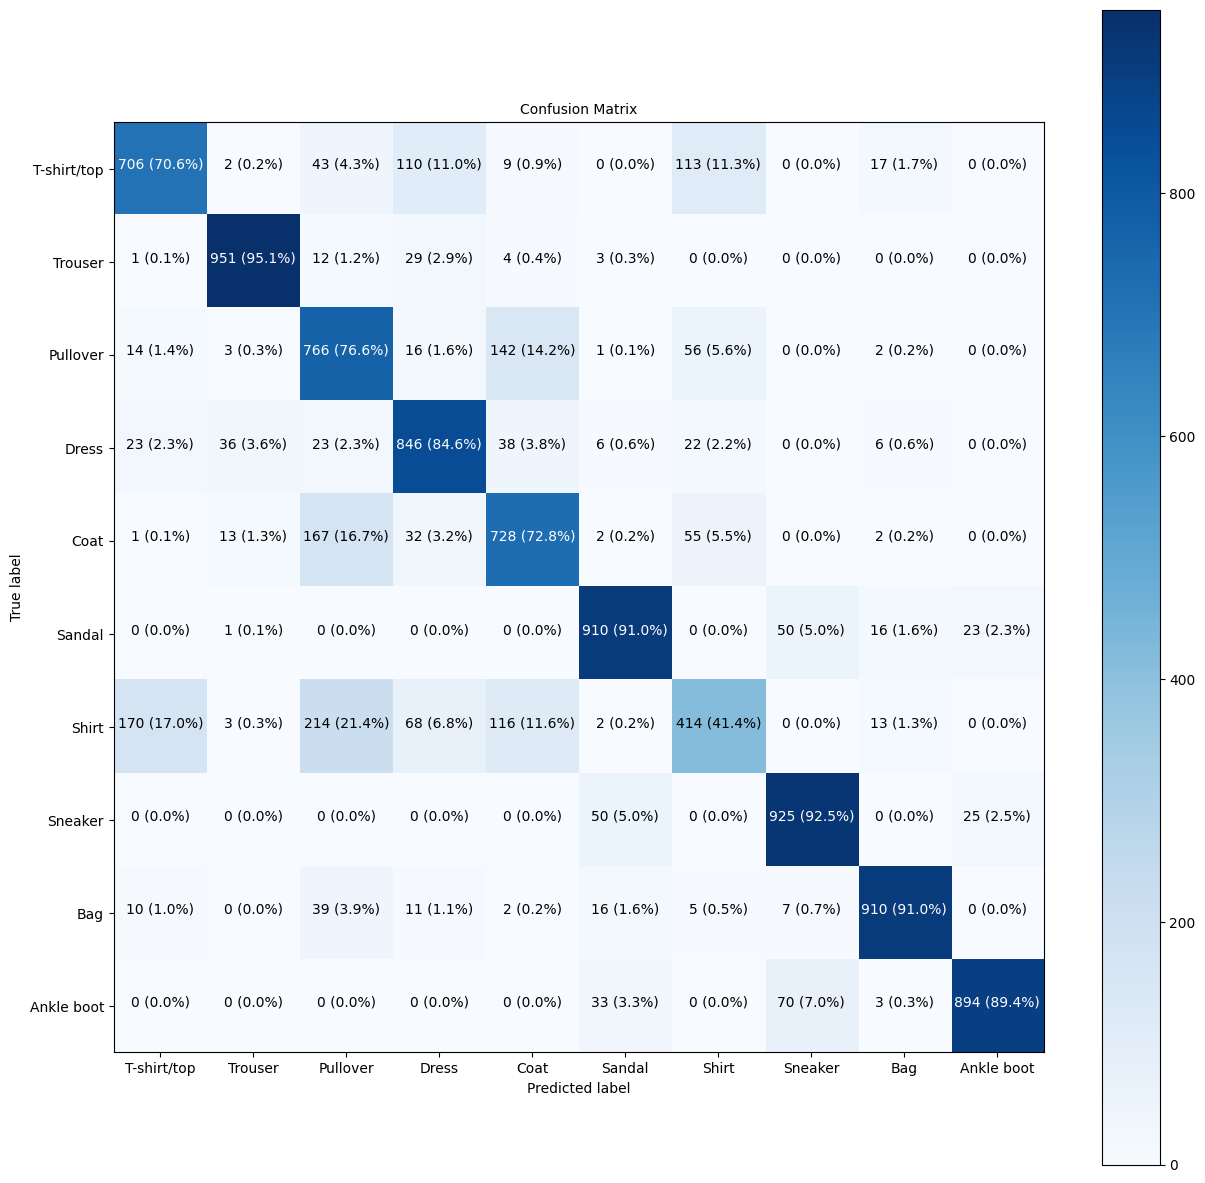

In [42]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_name,figsize=(15,15),text_size=10)

In [47]:
import random

def plot_random_image(model,images,true_labels,classes):
  """
  Picks a rondom image, plots it and labels it with a prediction and truth label
  """

  # Set up random seed
  i = random.randint(0,len(images))

  # Create preductions and targets

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot image
  plt.imshow(target_image,cmap="gray")


  # Change the color of the tittle depending on the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                                                    color=color)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


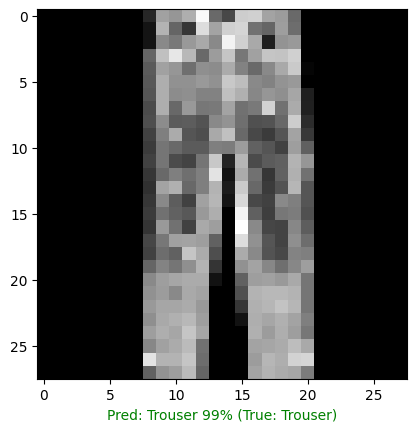

In [71]:
# Check out a random image as well as its predition
plot_random_image(model=model_14,images=test_data_norm,true_labels=test_labels,classes=class_name)

## What patterns is our model learning?

In [72]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_15, built=True>,
 <Dense name=dense_16, built=True>,
 <Dense name=dense_17, built=True>]

In [73]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_15, built=True>

In [74]:
# Get the patterns of a layer in our network

weigths, biases = model_14.layers[1].get_weights()

#shapes
weigths.shape,biases.shape

((784, 4), (4,))

## Noe let's check out the biases vector

In [75]:
# Biases and biases shape
biases,biases.shape

(array([1.9436494 , 0.48188624, 1.6427896 , 1.4973878 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get inizialized as zero ( at least in the case of a TensorFlow Dense layer).

The bias vector dictaters  how much the patterns within the corresponding weights matrix should influence the next layer.

In [76]:
model_14.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

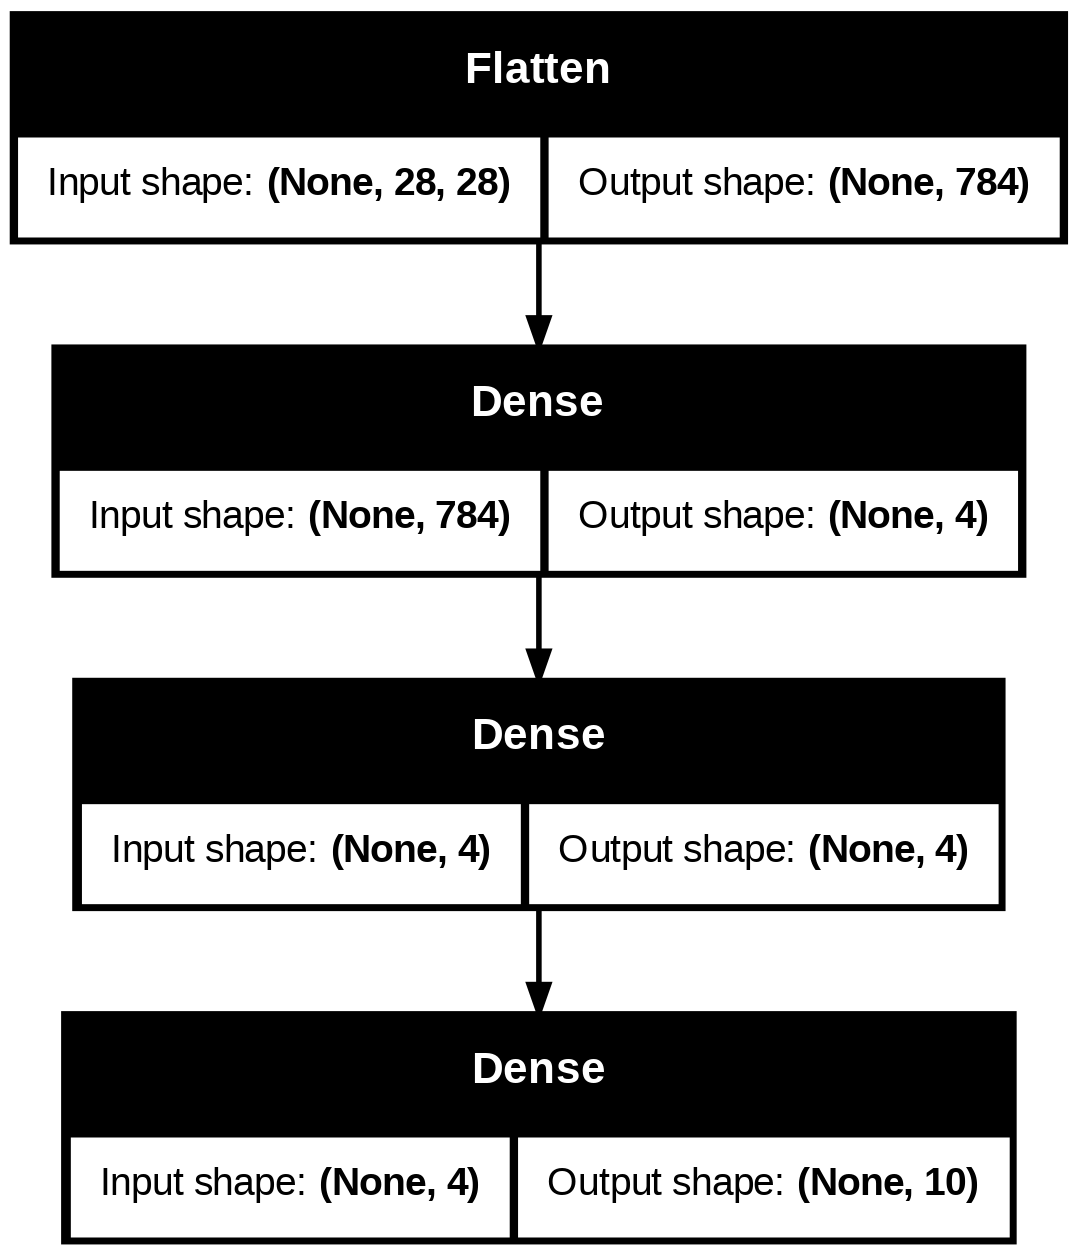

In [77]:
# Let's check out another way of viewing ouyr deep learning models

from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model=model_14,show_shapes=True)